<a href="https://colab.research.google.com/github/CShorten/Robust-Vector-Search/blob/main/Robust_Vector_Search_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Robust Vector Search </h1>

<h2> Check GPU </h2>

In [1]:
!nvidia-smi

Mon Apr 11 14:36:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    22W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

<h2> Get Data </h2>

In [1]:
!mkdir train_images

In [2]:
!mkdir test_images

In [3]:
from tensorflow import keras
import numpy as np
from PIL import Image

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

for i, img in enumerate(x_train):
  im = Image.fromarray(img)
  im.save("train_images/img-"+str(i)+"-label-"+str(np.argmax(y_train[i]))+".jpg")

for i, img in enumerate(x_test):
  im = Image.fromarray(img)
  im.save("test_images/img-"+str(i)+"-label-"+str(np.argmax(y_test[i]))+".jpg")

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
!zip -r train_images.zip train_images > /dev/null
!zip -r test_images.zip test_images > /dev/null

<h2> Get CLIP from Jina AI CLIP-as-a-service </h2>

<p> Might not be doable with Colab yet </p>

https://examples.jina.ai/clip-as-service/

In [6]:
!pip install --quiet clip-server
!pip install --quiet clip-client

     |████████████████████████████████| 1.4 MB 15.9 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 243 kB 49.5 MB/s 
     |████████████████████████████████| 623 kB 65.6 MB/s 
     |████████████████████████████████| 229 kB 64.3 MB/s 
     |████████████████████████████████| 146 kB 35.3 MB/s 
     |████████████████████████████████| 1.1 MB 60.8 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 596 kB 55.6 MB/s 
     |████████████████████████████████| 1.8 MB 36.8 MB/s 
     |████████████████████████████████| 3.6 MB 60.5 MB/s 
     |████████████████████████████████| 3.8 MB 46.5 MB/s 
     |████████████████████████████████| 10.9 MB 56.6 MB/s 
     |████████████████████████████████| 111 kB 71.8 MB/s 
     |████████████████████████████████| 1.0 MB 55.5 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 51 kB 7.2 MB/s 
     |███████████████

In [41]:
from clip_client import Client

c = Client('grpc://demo-cas.jina.ai:51000')

lst_test = ['./train_images/img-0-label-6.jpg', './train_images/img-1-label-9.jpg', './train_images/img-2-label-9.jpg', './train_images/img-3-label-4.jpg', './train_images/img-4-label-1.jpg', './train_images/img-5-label-1.jpg', './train_images/img-6-label-2.jpg', './train_images/img-7-label-7.jpg', './train_images/img-8-label-8.jpg', './train_images/img-9-label-3.jpg', './train_images/img-10-label-4.jpg', './train_images/img-11-label-7.jpg', './train_images/img-12-label-7.jpg', './train_images/img-13-label-2.jpg', './train_images/img-14-label-9.jpg', './train_images/img-15-label-9.jpg']

img_vector = c.encode(lst_test)

img_vector

array([[-0.02248 , -0.08264 , -0.2471  , ...,  0.8047  , -0.0848  ,
        -0.1482  ],
       [ 0.1609  , -0.1165  ,  0.2119  , ...,  0.976   ,  0.06714 ,
        -0.08105 ],
       [ 0.2668  ,  0.01823 , -0.1553  , ...,  1.025   ,  0.05994 ,
         0.1401  ],
       ...,
       [ 0.267   ,  0.0548  , -0.2421  , ...,  1.122   , -0.06354 ,
        -0.0979  ],
       [ 0.4153  , -0.1826  , -0.4172  , ...,  1.008   ,  0.465   ,
         0.0394  ],
       [ 0.06116 , -0.003952, -0.2382  , ...,  0.8677  , -0.1514  ,
         0.1719  ]], dtype=float16)

In [ ]:
# get from the Docarray
clip_cifar_embeddings = []

In [34]:
clip_embeds[0]

📄 Document: cdce8839d9ea581a214fdc14555f6dd5
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ tensor    │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
│           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
│           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
│           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
│           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
│           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄[38;2;198;142;25

In [ ]:
clip_embeds = DocumentArray()

path_template = "./train_images/img-"
image_paths = []
for i, img in enumerate(x_train):
  if i % 5000 == 1:
    print(i)
  if i % 32 == 0 and i > 0:
    # run image_paths through CLIP
    # empty out the image_path list
    clip_embeddings = c.encode(image_paths)
    for i, embed in enumerate(clip_embeddings):
      save_name = image_paths[i].replace("./train_images/", "./train_embeds/").replace(".jpg", ".npy")
      np.save(save_name, embed)
    image_paths = []
  image_paths.append(path_template+str(i)+"-label-"+str(np.argmax(y_train[i]))+".jpg")

In [54]:
!zip -r cifar10_clip_embeds.zip train_embeds > /dev/null

In [ ]:
!zip -r train_images.zip train_images > /dev/null

In [45]:
!mkdir train_embeds

In [50]:
demo = np.load("./train_embeds/img-31-label-9.npy")

<h2> ResNet </h2>

In [8]:
import torchvision
model = torchvision.models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class finetuned_resnet(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = torchvision.models.resnet50(pretrained=True)
    self.fc1 = nn.Linear(1000, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)

  def forward(self, x):
    x = self.model(x)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.softmax(self.fc3(x))


<h2> Data Augmentations </h2>

In [9]:
!pip install imgaug==0.4.0 > /dev/null

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


<h2> Testing Robustness </h2>

<h4> Aggregate Performance </h4>

In [ ]:
import torch
model(torch.from_numpy(x_train[0].reshape(1,32,32,3)))

In [ ]:
x_train[0].shape

<h3> Logit Visualization </h3>

<h3> Nearest Neighbor Robustness </h3>

In [11]:
!pip install docarray[full] > /dev/null

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [12]:
from docarray import Document, DocumentArray

DATA_PATH = f'train_images/*.jpg'

image_db = DocumentArray.from_files(DATA_PATH, size=50, storage="weaviate", config={
    "host": "cifar10newexample.semi.network",
    "port": "80",
    "name": "Image"
})

image_db.summary()

╭────────────────── Documents Summary ──────────────────╮
│                                                       │
│   Length                 100                          │
│   Homogenous Documents   True                         │
│   Common Attributes      ('id', 'mime_type', 'uri')   │
│   Multimodal dataclass   False                        │
│                                                       │
╰───────────────────────────────────────────────────────╯
╭───────────────────── Attributes Summary ─────────────────────╮
│                                                              │
│   Attribute   Data type   #Unique values   Has empty value   │
│  ──────────────────────────────────────────────────────────  │
│   id          ('str',)    50               False             │
│   mime_type   ('str',)    1                False             │
│   uri         ('str',)    50               False             │
│                                                              │
╰──────────────────────────────────────────────────────────────╯
╭──────────── DocumentArrayWeaviate Config ─────────────╮
│                                                       │
│   host               cifar10newexample.semi.network   │
│   port               80                               │
│   protocol           http                             │
│   name               Image                            │
│   serialize_config   {}                               │
│   n_dim              None                             │
│                                                       │
╰───────────────────────────────────────────────────────╯

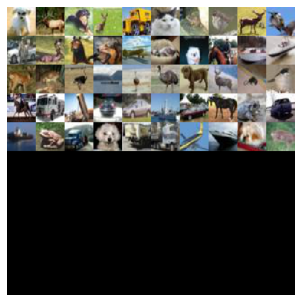

In [13]:
image_db.plot_image_sprites()

In [14]:
def preproc(d: Document):
  return (d.load_uri_to_image_tensor()
           .set_image_tensor_shape((32, 32))
           .set_image_tensor_normalization()
           .set_image_tensor_channel_axis(-1, 0))

image_db.apply(preproc)

╭─────────────────────── Documents Summary ───────────────────────╮
│                                                                 │
│   Length                 50                                     │
│   Homogenous Documents   True                                   │
│   Common Attributes      ('id', 'tensor', 'mime_type', 'uri')   │
│   Multimodal dataclass   False                                  │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   id          ('str',)       50               False             │
│   mime_type   ('str',)       1                False             │
│   tensor      ('ndarray',)   50               False             │
│   uri         ('str',)       50               False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯
╭──────────── DocumentArrayWeaviate Config ─────────────╮
│                                                       │
│   host               cifar10newexample.semi.network   │
│   port               80                               │
│   protocol           http                             │
│   name               Image                            │
│   serialize_config   {}                               │
│   n_dim              None                             │
│                                                       │
╰───────────────────────────────────────────────────────╯

In [55]:
import torch
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

image_db.embed(model, device=device, batch_size=32);

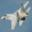

In [56]:
QUERY_IMAGE = "test_images/img-10-label-0.jpg"

query_doc = Document(uri=QUERY_IMAGE)
query_doc.display()

In [110]:
query_doc = preproc(query_doc)
query_doc.embed(model, device=device)

📄 Document: 56cc7b34256fbe6096d11be89a54a023
╭────────────┬─────────────────────────────────────────────────────────────────╮
│ Attribute  │ Value                                                           │
├────────────┼─────────────────────────────────────────────────────────────────┤
│ tensor     │ <class 'numpy.ndarray'> in shape (3, 32, 32), dtype: float32    │
│ mime_type  │ image/jpeg                                                      │
│ uri        │ test_images/img-10-label-0.jpg                                  │
│ embedding  │ <class 'torch.Tensor'> in shape (1000,), dtype: float32         │
╰────────────┴─────────────────────────────────────────────────────────────────╯

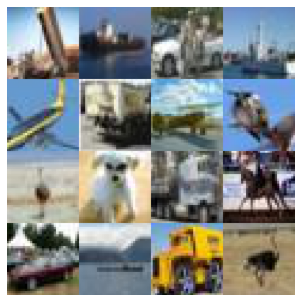

In [111]:
top16 = image_db.find(query_doc, limit=16)
top16.plot_image_sprites(image_source="uri")

In [10]:
from imgaug import augmenters as iaa

randaugment = iaa.RandAugment(n=3, m=7)
rotate = iaa.Affine(rotate=(-45, 45))
crop = iaa.Crop(percent=(0, 0.2))
noise = iaa.AdditiveGaussianNoise(scale=(10, 30))

In [60]:
!mkdir augmented_images

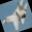

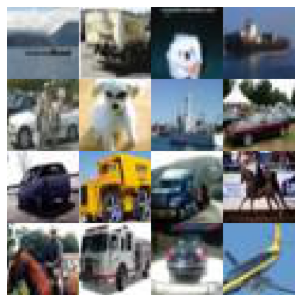

In [114]:
AUG_QUERY_PATH = "augmented_images/demo-1.jpg"
import matplotlib.pyplot as plt

rotated_airplane = rotate(image=x_test[10])
plt.imshow(rotated_airplane);
im = Image.fromarray(rotated_airplane)
im.save(AUG_QUERY_PATH)

aug_query_doc = Document(uri=AUG_QUERY_PATH)
aug_query_doc.display()

aug_query_doc = preproc(aug_query_doc)

aug_query_doc.embed(model)

top16 = image_db.find(aug_query_doc, limit=16)
top16.plot_image_sprites(image_source="uri")

In [120]:
# Probably need to extend to query_path

def robust_query_test(database, query, query_path, model, augs, aug_names, K):
  query_doc = Document(uri=query_path)
  query_doc = preproc(query_doc)
  query_doc.embed(model)
  for i, aug in enumerate(augs):
    print(aug_names[i])
    print("*"*50)
    print("\n")
    augmented_query = aug(image=query)
    im = Image.fromarray(augmented_query)
    AUG_QUERY_PATH = "augmented_images/demo-"+str(i)+".jpg"
    im.save(AUG_QUERY_PATH)
    augmented_query_doc = Document(uri=AUG_QUERY_PATH)
    augmented_query_doc = preproc(augmented_query_doc)
    augmented_query_doc.embed(model, device=device)
    original_top16 = database.find(query_doc, limit=16)
    original_top16.plot_image_sprites(image_source="uri")
    augmented_top16 = database.find(augmented_query_doc, limit=16)
    augmented_top16.plot_image_sprites(image_source="uri")
    original_top_n_matches = database.find(query_doc, limit=K)
    augmented_top_n_matches = database.find(augmented_query_doc, limit=K)

    org_match_ids = set(original_top_n_matches[:, "id"])
    print(org_match_ids)
    aug_match_ids = set(augmented_top_n_matches[:, "id"])
    print(aug_match_ids)
    set_union = len(org_match_ids.union(aug_match_ids))
    set_intersection = len(org_match_ids.intersection(aug_match_ids))
    set_metric = set_intersection / (set_union + set_intersection) * 100  
    print("The original and augmented query share " + str(set_metric) + "% of their neighbors\n")

Rotate
**************************************************




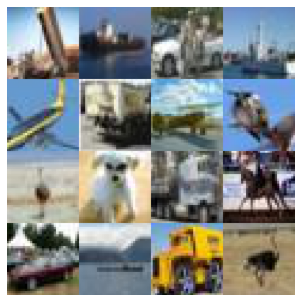

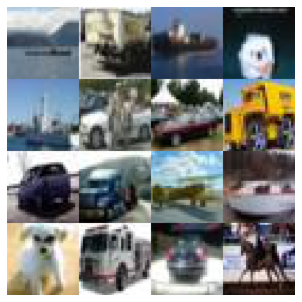

{'f3fa3a3103582b914ab696a15479ef1b', '2d68269c1320fd286be358f04795edd3', '1bd863dd083fb6cdd755da151046428d', 'bf63bfdcca978750a7df1ee91d97b52d', 'cdca85f2775ed9eac7f3b7a82b2cacbd', '98b13eba6d55d416336db1754e781fc9', 'b1644d8855bc04b5a12e5c4e992e3a75', '2bd16e376fd216396028c6eb130bddc9', '23c7bc7cca1f9d6add2b896a972ba214', '07671e29b8c692747a24f7e5cf0bb0a2', '3c62e83635f2f678a89b0890b5d88e81', 'aa0e7c520d2fb5e08b6b1d1cb143cd96', '478185e6745c44bbe611875fd0069ccf', '21ca6e7f78960864d1f46dce77ea3829', 'e2d10a956f386c38572520d53b30feb1', 'db9f2eb7bfff7c8e9014524c3be6d387'}
{'2d68269c1320fd286be358f04795edd3', '1bd863dd083fb6cdd755da151046428d', 'bf63bfdcca978750a7df1ee91d97b52d', 'cdca85f2775ed9eac7f3b7a82b2cacbd', 'b1644d8855bc04b5a12e5c4e992e3a75', '9f134fc373a6e5240de1a2ba25a2620e', 'e29529abbf66c1c06cf993c4b3581f09', '2bd16e376fd216396028c6eb130bddc9', '23c7bc7cca1f9d6add2b896a972ba214', '07671e29b8c692747a24f7e5cf0bb0a2', '3c62e83635f2f678a89b0890b5d88e81', '8a40318898cfc13ae38ed5c59

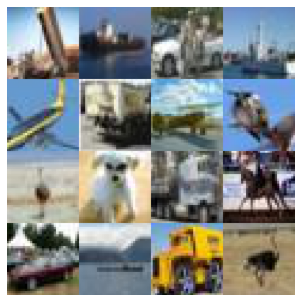

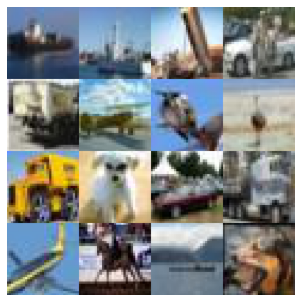

{'f3fa3a3103582b914ab696a15479ef1b', '2d68269c1320fd286be358f04795edd3', '1bd863dd083fb6cdd755da151046428d', 'bf63bfdcca978750a7df1ee91d97b52d', 'cdca85f2775ed9eac7f3b7a82b2cacbd', '98b13eba6d55d416336db1754e781fc9', 'b1644d8855bc04b5a12e5c4e992e3a75', '2bd16e376fd216396028c6eb130bddc9', '23c7bc7cca1f9d6add2b896a972ba214', '07671e29b8c692747a24f7e5cf0bb0a2', '3c62e83635f2f678a89b0890b5d88e81', 'aa0e7c520d2fb5e08b6b1d1cb143cd96', '478185e6745c44bbe611875fd0069ccf', '21ca6e7f78960864d1f46dce77ea3829', 'e2d10a956f386c38572520d53b30feb1', 'db9f2eb7bfff7c8e9014524c3be6d387'}
{'f3fa3a3103582b914ab696a15479ef1b', '10fb641e1b2b27e2f8d881bf1f271f81', '2d68269c1320fd286be358f04795edd3', 'bf63bfdcca978750a7df1ee91d97b52d', '1bd863dd083fb6cdd755da151046428d', 'cdca85f2775ed9eac7f3b7a82b2cacbd', 'b1644d8855bc04b5a12e5c4e992e3a75', '2bd16e376fd216396028c6eb130bddc9', '23c7bc7cca1f9d6add2b896a972ba214', '07671e29b8c692747a24f7e5cf0bb0a2', 'aa0e7c520d2fb5e08b6b1d1cb143cd96', '3c62e83635f2f678a89b0890b

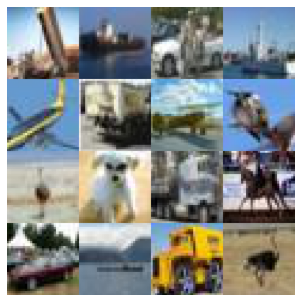

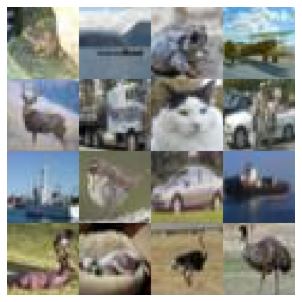

{'f3fa3a3103582b914ab696a15479ef1b', '2d68269c1320fd286be358f04795edd3', '1bd863dd083fb6cdd755da151046428d', 'bf63bfdcca978750a7df1ee91d97b52d', 'cdca85f2775ed9eac7f3b7a82b2cacbd', '98b13eba6d55d416336db1754e781fc9', 'b1644d8855bc04b5a12e5c4e992e3a75', '2bd16e376fd216396028c6eb130bddc9', '23c7bc7cca1f9d6add2b896a972ba214', '07671e29b8c692747a24f7e5cf0bb0a2', '3c62e83635f2f678a89b0890b5d88e81', 'aa0e7c520d2fb5e08b6b1d1cb143cd96', '478185e6745c44bbe611875fd0069ccf', '21ca6e7f78960864d1f46dce77ea3829', 'e2d10a956f386c38572520d53b30feb1', 'db9f2eb7bfff7c8e9014524c3be6d387'}
{'da158981869156c513f0a03101e2fdfe', '2d68269c1320fd286be358f04795edd3', '1bd863dd083fb6cdd755da151046428d', 'db0b618b1ec20faa008dd07afc0025cf', '7fada75a41b1af39145b8b3f737d0bc8', 'd2b997357c774906502c7964a684ac23', '98b13eba6d55d416336db1754e781fc9', '2bd16e376fd216396028c6eb130bddc9', '23c7bc7cca1f9d6add2b896a972ba214', '71769f2246e12fa404131be86e80d2d0', '3c62e83635f2f678a89b0890b5d88e81', 'f09eb02ed1b4209737faba959

In [121]:
model.load_weights("")
robust_query_test(image_db, x_test[10], "test_images/img-10-label-0.jpg", model, [rotate, crop, noise], ["Rotate", "Crop", "Noise"], 16)